# Imports

In [37]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import Analyser
import researchpy as rp
from hyperopt import hp
from hyperopt import rand, tpe
from hyperopt import Trials
from hyperopt import fmin

# Read data

In [2]:
df = pd.read_csv('Facebook_Ads.csv', encoding='ISO-8859-1')

# Create and set-up Solver solution
Firstly, define space, a dictionary with the desired splits and their uniform distribution for searching. 
Secondly, define objective-function, which bins the metric variable "salary" according the number of splits. 
Thirdly, apply the solver for the different splits/breaks/bins to find the maximum correlation (CramerV) between the 'Clicked' and previous binned 'Salary_categorized' variable. 

In [4]:
# Sets up a dictionary for the binning. Each element defines a split with their distribution.
# Number of splits plus the range needs to be defined.
def get_space(p_breaks, p_min, p_max): 
    dicts = {}
    keys = range(p_breaks)
    for i in keys:
        dicts[i] = hp.uniform(str(i), p_min, p_max)
    return dicts

# objective-function to MINIMIZE !!! for the solver
# Salary variable is binned accoring the input space.
# CramerV value (for Clicked and Salary_categorized) is picked up (negative) to minimize.
def objectiveX(space):
    temp = df
    spaceList = []
    spaceList = [int(space[i]) for i in range(0, len(space))]
    bins = spaceList
    bins.sort()
    group_names = [i for i in range(0, len(bins) - 1)]
    temp['Salary_cat'] = np.digitize(temp['Salary'], bins)
    results = np.array(rp.crosstab(temp['Clicked'], temp['Salary_cat'], test= 'chi-square')[1])[2][1]
    del bins
    return -results

In [5]:
# Set-up the algorithms and define the number of desired breaks
tpe_algo              = tpe.suggest
rand_algo             = rand.suggest
tpe_best_container    = []
tpe_trials_conatiner  = []
breaks                = [2,3,4,5,10,20,50,100]

for i in breaks:
    print(i, ' Breaking points considered')
    
    space = get_space(i, df['Salary'].min(), df['Salary'].max())
    tpe_trials  = Trials()
    #rand_trials = Trials()
    tpe_trials_conatiner.append(tpe_trials)
    
    tpe_best = fmin(fn=objectiveX, 
                    space=space, 
                    algo=tpe_algo,       # rand_algo  
                    trials=tpe_trials,   # rand_trials 
                    max_evals=1000, 
                    rstate= np.random.RandomState(50))
    
    tpe_best_container.append(tpe_best)

2  Breaking points considered
100%|██████████| 1000/1000 [02:27<00:00,  6.39trial/s, best loss: -0.6791]
3  Breaking points considered
100%|██████████| 1000/1000 [02:41<00:00,  6.15trial/s, best loss: -0.6869]
4  Breaking points considered
100%|██████████| 1000/1000 [02:57<00:00,  5.43trial/s, best loss: -0.6886]
5  Breaking points considered
100%|██████████| 1000/1000 [03:04<00:00,  5.07trial/s, best loss: -0.6886]
10  Breaking points considered
100%|██████████| 1000/1000 [04:14<00:00,  3.42trial/s, best loss: -0.6961]
20  Breaking points considered
100%|██████████| 1000/1000 [06:48<00:00,  2.29trial/s, best loss: -0.7075]
50  Breaking points considered
100%|██████████| 1000/1000 [12:55<00:00,  1.23s/trial, best loss: -0.725]
100  Breaking points considered
100%|██████████| 1000/1000 [24:31<00:00,  1.99s/trial, best loss: -0.754]


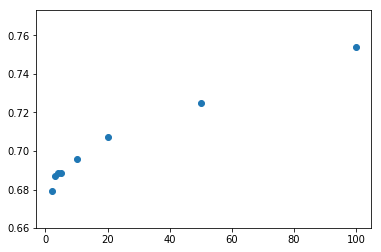

In [70]:
CramerVs = [-tpe_trials_conatiner[i].best_trial['result']['loss'] for i in range(0, len(breaks))]
plt.scatter(breaks,CramerVs)
plt.show()

Ran for each number of breaks [2,3,4,5,10,20,50,100] 1000 trials to maximise the correlation metric CramerV and in finding the optimum breaks in discretizing/binning the 'Salary'-variable.
Note: the number of bins is determined by simply 'number of breaks + 1'. 
With number of breaks the correlation metric CramerV increased slightly as well.

# Chi-square-test and CramerV for the different solver-solutions
The split for the different number of breaks becomes more and more a visual "V" in the bar-chart with having one category on the one side and the other category on the opposite side.  

In [6]:
myAnalyser = Analyser.Analyser()

# Categorising having 3 bins

Splitting at: [38739, 62690]


,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,201.0135
1,p-value =,0.0000
2,Cramer's V =,0.6347


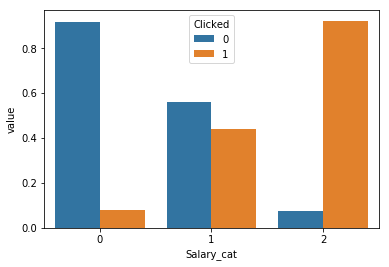

In [26]:
bins = [int(tpe_best_container[1][str(i)]) for i in range(0, breaks[0])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

# Categorising having 4 bins

Splitting at: [38739, 51288, 62690]


,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,235.4205
1,p-value =,0.0000
2,Cramer's V =,0.6869


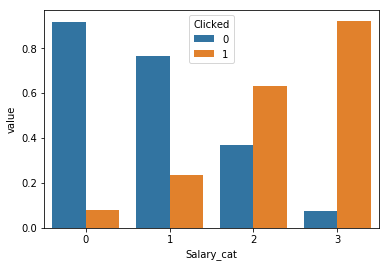

In [24]:
bins = [int(tpe_best_container[1][str(i)]) for i in range(0, breaks[1])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

# Categorising having 5 bins

Splitting at: [43160, 51319, 57027, 69794]


,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,236.5830
1,p-value =,0.0000
2,Cramer's V =,0.6886


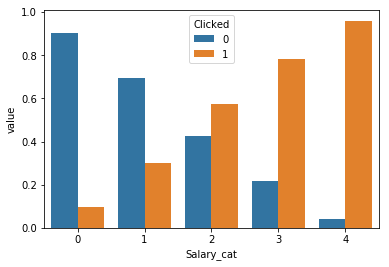

In [28]:
bins = [int(tpe_best_container[2][str(i)]) for i in range(0, breaks[2])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

# Categorising having 6 bins

Splitting at: [30955, 42595, 51432, 58303, 71367]


,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,236.5952
1,p-value =,0.0000
2,Cramer's V =,0.6886


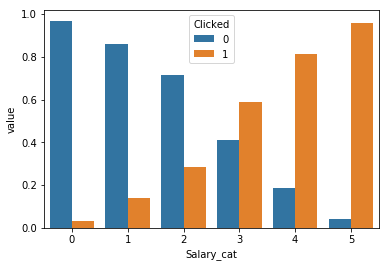

In [29]:
bins = [int(tpe_best_container[3][str(i)]) for i in range(0, breaks[3])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

# Categorising having 11 bins

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,241.8040
1,p-value =,0.0000
2,Cramer's V =,0.6961


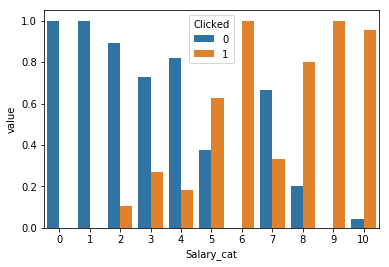

In [74]:
bins = [int(tpe_best_container[4][str(i)]) for i in range(0, breaks[4])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],11)[16]

# Categorising having 21 bins

,Chi-square test,results
0,Pearson Chi-square ( 19.0) =,249.7842
1,p-value =,0.0000
2,Cramer's V =,0.7075


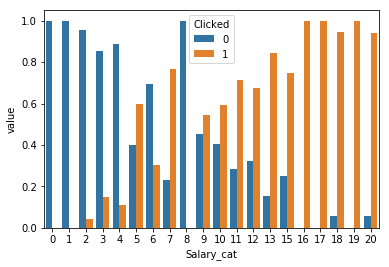

In [73]:
bins = [int(tpe_best_container[5][str(i)]) for i in range(0, breaks[5])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],21)[16]

# Categorising having 51 bins

,Chi-square test,results
0,Pearson Chi-square ( 46.0) =,262.2821
1,p-value =,0.0000
2,Cramer's V =,0.7250


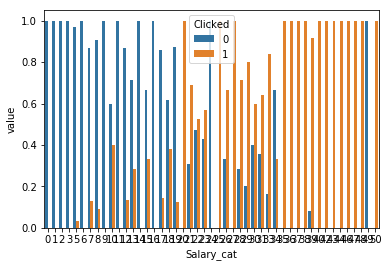

In [72]:
bins = [int(tpe_best_container[6][str(i)]) for i in range(0, breaks[6])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],51)[16]

# Categorising having 101 bins

,Chi-square test,results
0,Pearson Chi-square ( 81.0) =,283.7121
1,p-value =,0.0000
2,Cramer's V =,0.7540


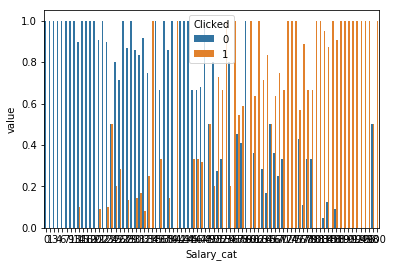

In [71]:
bins = [int(tpe_best_container[7][str(i)]) for i in range(0, breaks[7])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],101)[16]